In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
def cost_function(X,y,w):        ###define·cost·function·
    hypothesis = np.dot(X,w.T)   ###calculation·of·hypothesis·for·all·instances···
    J = (1/(2*len(y))) * np.sum((hypothesis - y)**2)  
    return J

In [ ]:
def batch_gradient_descent(X,y,w,alpha,iters):
  
  cost_history = np.zeros(iters) # cost function for each iteration
  
  #initalize our cost history list to store the cost function on every iteration
  
  for i in range(iters):
    
    hypothesis = np.dot(X,w.T)
    w = w - (alpha/len(y)) * np.dot((hypothesis-y), X)
    cost_history[i] = cost_function(X,y,w)

  return w,cost_history

In [ ]:
def stochastic_gradient_descent(X,y,w,alpha, iters):
  
  cost_history = np.zeros(iters)
 
  for i in range(iters):
    
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  
  return w, cost_history

In [ ]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  
  return w, cost_history

In [ ]:
data = pd.read_excel(uploaded['data_q1.xlsx'])

In [ ]:
print(data)

In [ ]:
datan =data.values
X=datan[:,[0,1]]
m = X.shape[0] #no of examples
xmin = np.min(X, axis = 0)
xmax = np.max(X, axis = 0)
X = (X- xmin)/(xmax-xmin) #Normalization
pp = np.ones([m, 1]) # vector containg ones as all elements
X = np.append(pp,X, axis=1) #Column of ones
y=datan[:,2] #output
ymin = np.min(y, axis = 0)
ymax = np.max(y, axis = 0)
y = (y- ymin)/(ymax-ymin)

In [ ]:
print(X)

In [ ]:
w= np.zeros((X.shape[1])) ###weight initialization
print(w)

[0. 0. 0.]


In [ ]:
alpha=0.005
iters=500
batch_w,J_his = batch_gradient_descent(X,y,w,alpha,iters)

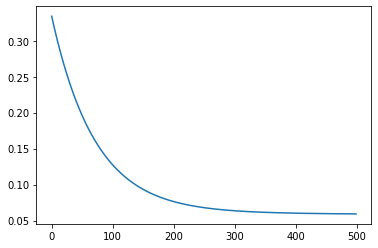

In [ ]:
plt.plot(range(iters),J_his)
plt.show()

In [ ]:
print(batch_w)

[0.52799868 0.20112163 0.24080326]


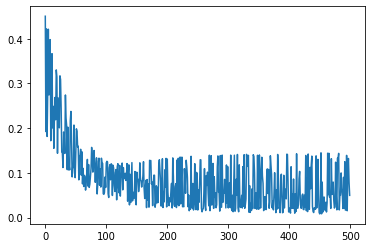

In [ ]:
alpha=0.01
iters=500
batch_size=30
mini_batch_w,J_mini_batch = MB_gradient_descent(X,y,w,alpha,iters, batch_size)

plt.plot(range(iters),J_mini_batch)
plt.show()

In [ ]:
print(mini_batch_w)

[0.53264732 0.17424192 0.25812162]


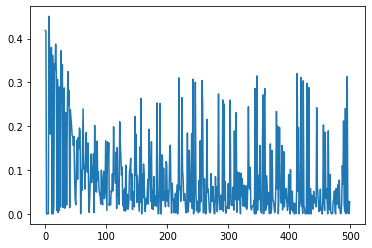

In [ ]:
n_epochs=500
alpha=0.01
w_n,J_sgd = stochastic_gradient_descent(X,y,w, alpha, n_epochs)
plt.plot(range(n_epochs),J_sgd)
plt.show()

In [ ]:
print(w_n) #SCD

[0.56750678 0.15126243 0.26207921]


In [ ]:
w1 = np.linspace(-10,10,500)
w2 = np.linspace(-10,10,500)
j = np.zeros((500,500))
w_model = np.zeros((3,1))
for xn in range(len(w1)):
  for yn in range(len(w2)):
    w_model[1] = w1[xn]
    w_model[2] = w2[yn]
    y_pred = np.dot(X,w_model)
    squared_errors = (y_pred - y)**2
    sum_squared_errors = np.sum(squared_errors)
    j[xn][yn] = sum_squared_errors

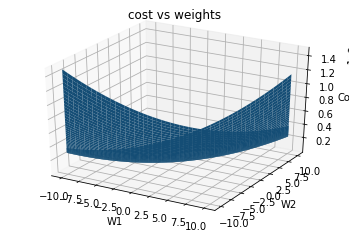

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w1, w2, j)
ax.set_xlabel('W1')
ax.set_ylabel('W2')
ax.set_zlabel('Cost')
ax.set_title('cost vs weights')
fig.show()
plt.show()

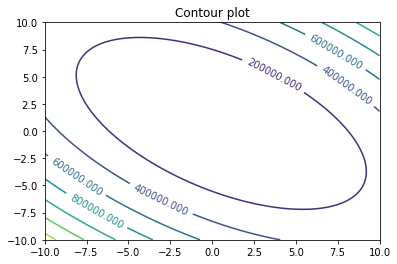

In [ ]:
plt.title('Contour plot')
contours = plt.contour(w1, w2, j)
plt.clabel(contours, inline=1, fontsize=10)
plt.show()